In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import numpy as np

In [22]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
# Inception Module Function
def inception_module(x, filters):
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)
    pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_conv = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool)
    return layers.Concatenate(axis=-1)([conv1x1, conv3x3, conv5x5, pool_conv])

In [26]:
# Build the Inception-inspired model for MNIST
inputs = layers.Input(shape=(28, 28, 1))
x = inception_module(inputs, [64, 128, 32, 32])
x = inception_module(x, [128, 192, 96, 64])
# Flatten the output and add dense layers for classification
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)

In [27]:
outputs = layers.Dense(10, activation='softmax')(x)  # 10 classes for digits 0-9

model = models.Model(inputs, outputs)


In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 1)            0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d_8 (Conv2D)           (None, 28, 28, 64)           128       ['input_2[0][0]']             
                                                                                                  
 conv2d_9 (Conv2D)           (None, 28, 28, 128)          1280      ['input_2[0][0]']       

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 [==============================] - 77s 67ms/step - loss: 0.1296 - accuracy: 0.9642 - val_loss: 0.0682 - val_accuracy: 0.9775
Epoch 2/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0385 - val_accuracy: 0.9876
Epoch 3/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0501 - val_accuracy: 0.9862
Epoch 4/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0615 - val_accuracy: 0.9852
Epoch 5/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0414 - val_accuracy: 0.9880


In [31]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: input_2
Trainable Parameters: 0

Layer Name: max_pooling2d_2
Trainable Parameters: 0

Layer Name: conv2d_8
Trainable Parameters: 128

Layer Name: conv2d_9
Trainable Parameters: 1280

Layer Name: conv2d_10
Trainable Parameters: 832

Layer Name: conv2d_11
Trainable Parameters: 64

Layer Name: concatenate_2
Trainable Parameters: 0

Layer Name: max_pooling2d_3
Trainable Parameters: 0

Layer Name: conv2d_12
Trainable Parameters: 32896

Layer Name: conv2d_13
Trainable Parameters: 442560

Layer Name: conv2d_14
Trainable Parameters: 614496

Layer Name: conv2d_15
Trainable Parameters: 16448

Layer Name: concatenate_3
Trainable Parameters: 0

Layer Name: flatten_1
Trainable Parameters: 0

Layer Name: dense_2
Trainable Parameters: 96338176

Layer Name: dense_3
Trainable Parameters: 2570



313/313 [==============================] - 3s 10ms/step


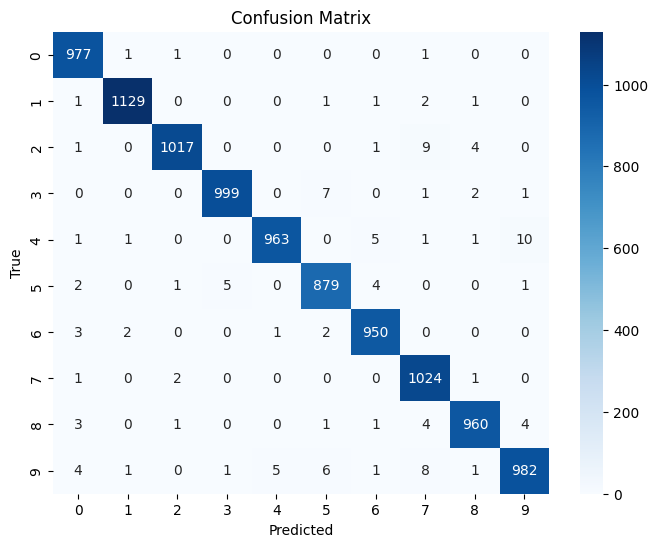

In [32]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.9880516349658442
Recall: 0.988
F1 Score: 0.9879984267315369
